**Module 6  APIs**
- Perform tasks using new Python libraries and modules.

- Retrieve and use data from an API "get" request to a server.

- Retrieve and store values from a JSON array.

- Use try and except blocks to resolve errors.

- Write Python functions.

- Create scatter plots using the Matplotlib library, and apply styles and features to a plot.

- Perform linear regression, and add regression lines to scatter plots.

- Create heatmaps, and add markers using the Google Maps API.

**Project Plan**
Basic Project Plan


Task: Collect and analyze weather data across cities worldwide.

Purpose: PlanMyTrip will use the data to recommend ideal hotels based on clients' weather preferences.

Method: Create a Pandas DataFrame with 500 or more of the world's unique cities and their weather data in real time. This process will entail collecting, analyzing, and visualizing the data.

The analysis of the data will be split into three main parts, or stages.

Collect the Data

- Use the NumPy module to generate more than 1,500 random latitudes and longitudes.

- Use the citipy module to list the nearest city to the latitudes and longitudes.

- Use the OpenWeatherMap API to request the current weather data from each unique city in your list.

- Parse the JSON data from the API request.

- Collect the following data from the JSON file and add it to a DataFrame:

- City, country, and date

- Latitude and longitude

- Maximum temperature

- Humidity

- Cloudiness

- Wind speed

- Exploratory Analysis with Visualization

Create scatter plots of the weather data for the following comparisons:
- Latitude versus temperature

- Latitude versus humidity

- Latitude versus cloudiness

- Latitude versus wind speed

- Determine the correlations for the following weather data:

- Latitude and temperature

- Latitude and humidity

- Latitude and cloudiness

- Latitude and wind speed

- Create a series of heatmaps using the Google Maps and Places API that showcases the following:

- Latitude and temperature

- Latitude and humidity

- Latitude and cloudiness

- Latitude and wind speed

- Visualize Travel Data

Create a heatmap with pop-up markers that can display information on specific cities based on a customer's travel preferences. Complete these steps:


- Filter the Pandas DataFrame based on user inputs for a minimum and maximum temperature.

- Create a heatmap for the new DataFrame.

- Find a hotel from the cities' coordinates using Google's Maps and Places API, and Search Nearby feature.

- Store the name of the first hotel in the DataFrame.

- Add pop-up markers to the heatmap that display information about the city, current maximum temperature, and a hotel in the city.

#### Collect the data


In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

Add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.

In the next cell, add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500 )
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500 )
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

Add citipy.   From Module 6.1.5

In [4]:
# import citipy
from citipy import citipy


In [5]:
#create a list for holding the cities.
cities = []
#Indentify the nearest city for each latitude adn longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city in unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count.
len(cities)
    

619

##### The JavaScript Object Notation Format for API Data - have no idea what happened to this string of thought.
To retrieve data from a website, make a "request," which returns data in a text format, not in a tab- or comma-separated file.

One format used to parse data is JavaScript Object Notation (JSON). The JSON format is also referred to as an "object" or "JSON object." The data inside a JSON object opens and closes with curly braces, much like a Python dictionary. Inside the JSON object is a collection of dictionaries and arrays.


#### Psudeocode -  do the following:

1. Import dependencies and initialize counters and an empty list that will hold the weather data.

2. Loop through the cities list.

3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.

4. Build the city_url or endpoint for each city.

5. Log the URL and the record and set numbers.

6. Make an API request for each city.

7. Parse the JSON weather data for the following:
    - City, country, and date

    - Latitude and longitude

    - Maximum temperature

    - Humidity

    - Cloudiness

    - Wind speed

    - Add the data to a list in a dictionary format and then convert the list to a DataFrame.


##### Dependencies

In [6]:
#import dependencies, initialize empty lists and counters.

# Import the datetime module from the datetime library.
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters.
record_count = 1 
set_count = 1

from config import weather_api_key

url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key


Beginning Data Retrieval     
-----------------------------


In [7]:
## this would require 2 loops.  See next cel for better method.

## loop through all the cities in our list.
# for i in range(len(cities)):
    
#     #Group cities in sets of 50 for logging purposes.
#     if (i%50==0 and i>= 50):
#         set_count+=1
#         record_count = 1
#         #Create endpoint URL with each city.
#         city_url = url = "&q=" + cities [i]

The Enumerate method -  new code for loops

In [8]:
# Loop through all the cities in our list.
import sys
import requests
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i%50==0 and i>= 50):
        set_count+=1
        record_count = 1
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+") 
     
    # Log the URL, record, and set numbers and the city.   
    print(f"Processing Record {record_count} of Set {set_count}| {city}")    
    
   #add 1 to the record count.
    record_count += 1
        
# Run an API request for each of the cities.
    try:
         # Parse the JSON and retrieve data. 
            print(city_url)
            city_weather = requests.get(city_url).json()

            
            #Parse out the needed data
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp =city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            
            #convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y=%m-%d %H:%M:%S')
            
            #append the city information into the city_data list.
            city_data.append({"City":city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                                "Max Temp": city_max_temp,
                                "Humidity": city_humidity,
                                "Cloudiness": city_clouds,
                                "Wind Speed": city_wind,
                                "Country": city_country,
                                "Date": city_date})
            
    #if an error is expereinced, skip the city
    except:
            print("City not found.  Skipping...")
            pass
    
    #Indicate that Data loading is complete
    print("------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")
            
    

Processing Record 1 of Set 1| nelson bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=nelson+bay
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1| wilmington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=wilmington
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1| saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=saint-philippe
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1| albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=albany
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1| mahadday w

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 1| garissa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=garissa
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 1| bressuire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=bressuire
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 1| stepnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=stepnoye
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 1| dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=dikson
------------------------
Data Retrieval Complete      
-

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 2| hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=hilo
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 2| butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=butaritari
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 2| sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=sao+filipe
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 2| rorvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=rorvik
------------------------
Data Retrieval Complete      
-

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 3| tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=tiksi
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 3| constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=constitucion
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 3| carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=carnarvon
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 3| chumikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=chumikan
------------------------
Data Retrieval Complete   

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 3| roblin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=roblin
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 3| omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=omboue
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 3| abu kamal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=abu+kamal
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 3| bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=bilma
------------------------
Data Retrieval Complete      
---------

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 4| sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=sentyabrskiy
City not found.  Skipping...
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 4| kiriakion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=kiriakion
City not found.  Skipping...
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 4| pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=pevek
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 4| olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 5| ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=ambilobe
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 5| wajima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=wajima
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 5| bababe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=bababe
City not found.  Skipping...
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 5| donghai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=donghai
------------------------
Data Ret

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 5| ferme-neuve
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=ferme-neuve
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 5| daugavpils
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=daugavpils
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 5| chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=chapais
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5| khasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=khasan
------------------------
Data Retrieval Complete

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 6| nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=nanortalik
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 33 of Set 6| tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=tomatlan
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 34 of Set 6| gravdal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=gravdal
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 6| grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=grindavik
------------------------
Data Retrieval Complete

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7| vilhena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=vilhena
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7| aitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=aitape
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7| naro moru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=naro+moru
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 7| saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=saint+anthony
------------------------
Data Retrieval Comple

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 8| talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=talnakh
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 8| lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=lompoc
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 8| altos del rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=altos+del+rosario
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 8| mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=mandalgovi
------------------------
Data Retrieval 

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 8| saint-georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=saint-georges
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 8| svetlyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=svetlyy
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 8| deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=deputatskiy
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 8| tairua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=tairua
------------------------
Data Retrieval Co

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 9| bograd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=bograd
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 22 of Set 9| ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=ancud
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 9| bontang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=bontang
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 9| nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=nizhneyansk
City not found.  Skipping...
------------------------
Data

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 10| singuilucan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=singuilucan
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 10| peniche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=peniche
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 10| shibarghan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=shibarghan
City not found.  Skipping...
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 10| ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=ulaanbaatar
---------

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 10| praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=praia
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 10| lucapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=lucapa
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 10| gzhatsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=gzhatsk
City not found.  Skipping...
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 10| te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=te+anau
------------------------
Data Ret

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 11| moree
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=moree
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 11| nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=nioro
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 11| ternate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=ternate
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 11| machali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=machali
------------------------
Data Retrieval Complete      
---------

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12| constantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=constantine
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12| udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=udachnyy
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12| yagodnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=yagodnoye
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12| tofield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=tofield
------------------------
Data Retrieval Com

------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 12| kwinana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=kwinana
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 12| vernon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=vernon
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 46 of Set 12| vanderhoof
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=vanderhoof
------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 12| piranshahr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3a5ae24e582f7103a61b2f06bf741008&q=piranshahr
------------------------
Data Retrieval Comple

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nelson Bay,-32.7167,152.1500,63.00,100,75,4.61,AU,2021=03-28 20:49:53
1,Wilmington,34.2257,-77.9447,82.40,51,1,20.71,US,2021=03-28 20:52:48
2,Saint-Philippe,-21.3585,55.7679,77.00,83,0,6.91,RE,2021=03-28 20:54:15
3,Albany,42.6001,-73.9662,52.00,88,100,7.54,US,2021=03-28 20:53:46
4,Barrow,71.2906,-156.7887,-23.80,83,1,10.36,US,2021=03-28 20:50:05
...,...,...,...,...,...,...,...,...,...
564,Maxixe,-23.8597,35.3472,70.79,82,3,9.19,MZ,2021=03-28 20:56:18
565,Lhokseumawe,5.1801,97.1507,76.37,88,100,6.31,ID,2021=03-28 20:52:29
566,Sindor,62.8629,51.8905,29.88,92,100,7.72,RU,2021=03-28 20:56:18
567,Kabulusan,14.3615,121.4004,82.00,78,75,3.00,PH,2021=03-28 20:56:18


In [10]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nelson Bay,AU,2021=03-28 20:49:53,-32.7167,152.1500,63.00,100,75,4.61
1,Wilmington,US,2021=03-28 20:52:48,34.2257,-77.9447,82.40,51,1,20.71
2,Saint-Philippe,RE,2021=03-28 20:54:15,-21.3585,55.7679,77.00,83,0,6.91
3,Albany,US,2021=03-28 20:53:46,42.6001,-73.9662,52.00,88,100,7.54
4,Barrow,US,2021=03-28 20:50:05,71.2906,-156.7887,-23.80,83,1,10.36
5,Bethel,US,2021=03-28 20:54:15,41.3712,-73.4140,57.20,88,90,10.36
6,Haimen,CN,2021=03-28 20:50:03,23.1935,116.6142,69.80,94,0,4.45
7,Castro,BR,2021=03-28 20:54:16,-24.7911,-50.0119,68.29,88,100,4.29
8,Prigorodka,RU,2021=03-28 20:54:16,52.0447,39.7124,28.40,93,0,6.08
9,Sao Paulo Do Potengi,BR,2021=03-28 20:54:16,-5.8950,-35.7628,84.20,70,40,11.50


In [11]:
# Create the output file (CSV).  From section 6.2.7 mid page
output_data_file = "weather_data/cities.csv"

#Export the City_Data in a CSV
city_data_df.to_csv(output_data_file, index_label= "city_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

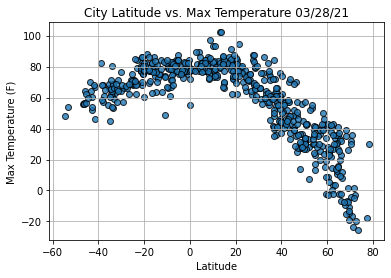

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

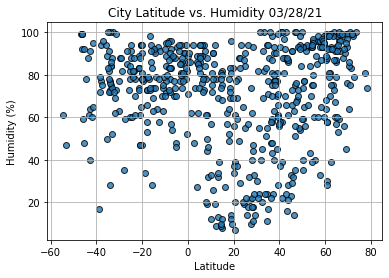

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

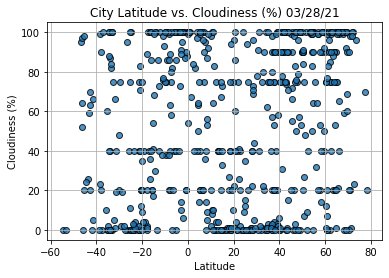

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

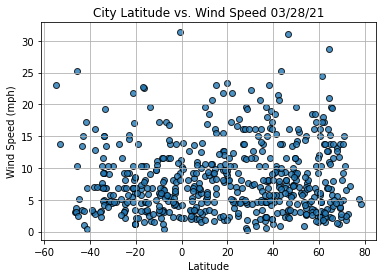

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

6.4.2 Find the Correlation Between Latitude and Maximum Temperature  The side project.

In [17]:
# # Perform linear regression.  From the top of 6.4.2
# (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# # Calculate the regression line "y values" from the slope and intercept.
# regress_values = x_values * slope + intercept

# # Get the equation of the line.
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Create a scatter plot of the x and y values.
# plt.scatter(x_values,y_values)
# # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
# plt.plot(x_values,regress_values,"r")
# # Annotate the text for the line equation and add its coordinates.
# plt.annotate(line_eq, (10,40), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Temp')
# plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    pass  

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
#plot_linear_regression()


In [21]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021=03-28 20:54:17
Lat                      -46.1927
Lng                       168.864
Max Temp                    55.99
Humidity                       99
Cloudiness                     52
Wind Speed                      3
Name: 13, dtype: object

In [22]:
city_data_df['Lat']>=0

0      False
1       True
2      False
3       True
4       True
       ...  
564    False
565     True
566     True
567     True
568    False
Name: Lat, Length: 569, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Wilmington,US,2021=03-28 20:52:48,34.2257,-77.9447,82.4,51,1,20.71
3,Albany,US,2021=03-28 20:53:46,42.6001,-73.9662,52.0,88,100,7.54
4,Barrow,US,2021=03-28 20:50:05,71.2906,-156.7887,-23.8,83,1,10.36
5,Bethel,US,2021=03-28 20:54:15,41.3712,-73.4140,57.2,88,90,10.36
6,Haimen,CN,2021=03-28 20:50:03,23.1935,116.6142,69.8,94,0,4.45


In [24]:
# Create Northern nad Southern Hemisphere Dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.

Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

Max Temps in both Hemispheres

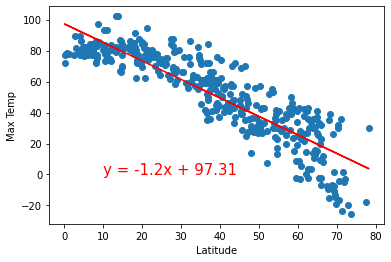

y = -1.2x + 97.31
The r value is: -0.884109


In [38]:
# Linear regression on the Northern Hemisphere - Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

#add linear regression for analysis as per 6.4.2 Findings request
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

print(f"The r value is: {r_value:.6f}")

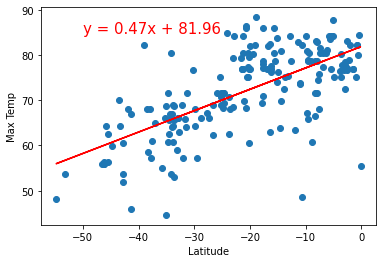

y = 0.47x + 81.96
The r value is: 0.664150


In [39]:
# Linear regression on the Southern Hemisphere - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r value is: {r_value:.6f}")



Humidity in both Hemispheres

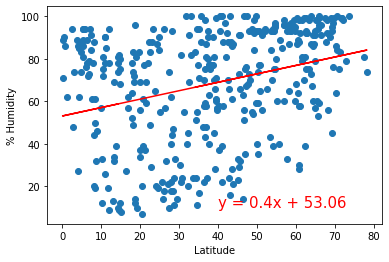

y = 0.4x + 53.06
The r value is: 0.305582


In [40]:
# Linear regression on the Northern Hemisphere - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r value is: {r_value:.6f}")


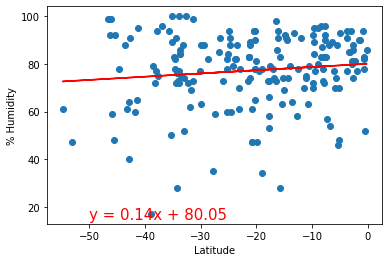

y = 0.14x + 80.05
The r value is: 0.116114


In [42]:
# Linear regression on the Southern Hemisphere - Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r value is: {r_value:.6f}")

Cloudiness for both hemispheres

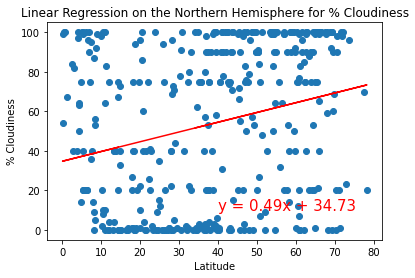

y = 0.49x + 34.73
The r value is: 0.255198


In [61]:
# Linear regression on the Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.title(f"Linear Regression on the Northern Hemisphere for % Cloudiness")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(40,10))

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r value is: {r_value:.6f}")


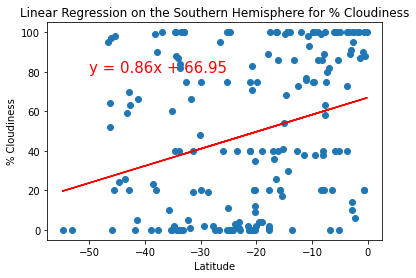

y = 0.86x + 66.95
The r value is: 0.293053


In [63]:
# Linear regression on the Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.title(f"Linear Regression on the Southern Hemisphere for % Cloudiness")


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,80))



# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r value is: {r_value:.6f}")

Linear regression for wind speed for both hemispheres

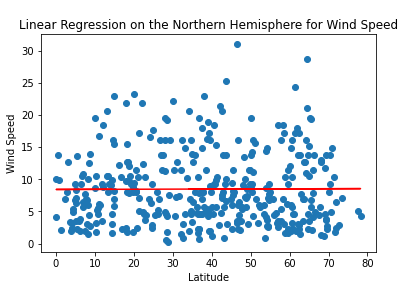

y = 0.0x + 8.43
The r value is: 0.006023


In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.title(f"Linear Regression on the Northern Hemisphere for Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))



# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r value is: {r_value:.6f}")

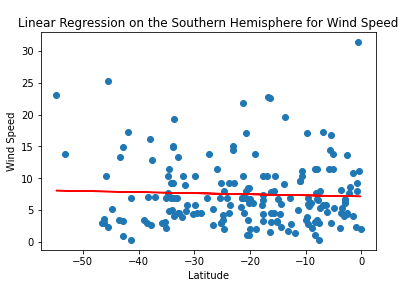

y = -0.02x + 7.16
The r value is: -0.043097


In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.title(f"Linear Regression on the Southern Hemisphere for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))


# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r value is: {r_value:.6f}")